In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_image='D:/Documents/Capstone/Project -2/New Bangladeshi/BangladeshiCrops/BangladeshiCrops/Train'

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 shear_range=0.1,
                                vertical_flip=False)
training_set=train_datagen.flow_from_directory(train_image,
                                              target_size=(224,224),
                                              class_mode='categorical',
                                              batch_size=512)

Found 10554 images belonging to 14 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 zoom_range=0.2)

test_set=test_datagen.flow_from_directory('D:/Documents/Capstone/Project -2/New Bangladeshi/BangladeshiCrops/BangladeshiCrops/Test',
                                              target_size=(224,224),
                                              class_mode='categorical',
                                              batch_size=512)

Found 2470 images belonging to 14 classes.


In [5]:
base_model = tf.keras.applications.InceptionResNetV2(
                     include_top=False,
                     weights='imagenet',
                     input_shape=(224,224,3)
                     )
 
base_model.trainable=False
 
model = tf.keras.Sequential([
        base_model,  
        tf.keras.layers.BatchNormalization(renorm=True),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(14, activation='softmax')
    ])

In [6]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.TruePositives()])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 5, 5, 1536)       54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 5, 5, 1536)       10752     
 tchNormalization)                                               
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                        

In [8]:
early = tf.keras.callbacks.EarlyStopping(patience=10, min_delta=0.001, restore_best_weights=True)

In [9]:
batch_size=1024
STEP_SIZE_TRAIN = training_set.n//training_set.batch_size
STEP_SIZE_VALID = test_set.n//test_set.batch_size

# fit model
history = model.fit(training_set, steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test_set,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=8,
                    callbacks=[early])

Epoch 1/8
20/20 [==============================] - 1039s 51s/step - loss: 1.2275 - accuracy: 0.5768 - auc: 0.9398 - precision: 0.7396 - recall: 0.4233 - true_positives: 4251.0000 - val_loss: 0.5602 - val_accuracy: 0.7944 - val_auc: 0.9877 - val_precision: 0.8526 - val_recall: 0.7427 - val_true_positives: 1521.0000
Epoch 2/8
20/20 [==============================] - 938s 48s/step - loss: 0.5459 - accuracy: 0.7864 - auc: 0.9880 - precision: 0.8282 - recall: 0.7342 - true_positives: 7373.0000 - val_loss: 0.4798 - val_accuracy: 0.8169 - val_auc: 0.9899 - val_precision: 0.8658 - val_recall: 0.7847 - val_true_positives: 1607.0000
Epoch 3/8
20/20 [==============================] - 947s 47s/step - loss: 0.4180 - accuracy: 0.8358 - auc: 0.9924 - precision: 0.8676 - recall: 0.7980 - true_positives: 8014.0000 - val_loss: 0.4241 - val_accuracy: 0.8438 - val_auc: 0.9909 - val_precision: 0.8695 - val_recall: 0.8130 - val_true_positives: 1665.0000
Epoch 4/8
20/20 [==============================] - 948

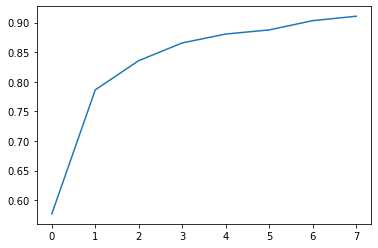

In [10]:
from matplotlib import pyplot
pyplot.plot(history.history['accuracy'])
pyplot.show()